In [34]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [4]:
# Specify the path to file
MTA_data = 'Dataset/MTA_Daily_Ridership_Data__Beginning_2020.csv'
# Read the csv file into a pandas DataFrame
df_MTA = pd.read_csv(MTA_data)

df_MTA.head(20)

,Date,Subways: Total Estimated Ridership,Subways: % of Comparable Pre-Pandemic Day,Buses: Total Estimated Ridership,Buses: % of Comparable Pre-Pandemic Day,LIRR: Total Estimated Ridership,LIRR: % of Comparable Pre-Pandemic Day,Metro-North: Total Estimated Ridership,Metro-North: % of Comparable Pre-Pandemic Day,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % of Comparable Pre-Pandemic Day,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % of Comparable Pre-Pandemic Day,Staten Island Railway: Total Estimated Ridership,Staten Island Railway: % of Comparable Pre-Pandemic Day
0,05/04/2023,3973546,0.69,1386768,0.61,206323.0,0.65,184698.0,0.65,30449,1.04,966836,1.00,7415.0,0.43
1,05/03/2023,4024222,0.70,1505646,0.66,209450.0,0.66,190553.0,0.67,30850,1.05,940822,0.98,7859.0,0.45
2,05/02/2023,3956665,0.69,1485902,0.65,211550.0,0.66,192621.0,0.67,29472,1.00,916459,0.95,7749.0,0.45
3,05/01/2023,3662358,0.64,1458277,0.64,188566.0,0.59,164578.0,0.57,27445,0.93,922971,0.96,6960.0,0.40
4,04/30/2023,1743700,0.72,577130,0.58,75065.0,0.82,65334.0,0.63,15451,0.83,786171,0.91,1354.0,0.41
5,04/29/2023,2179819,0.69,715099,0.54,85167.0,0.75,77009.0,0.52,15688,0.94,832504,0.91,1871.0,0.37
6,04/28/2023,3702897,0.66,1420918,0.65,195436.0,0.63,160861.0,0.56,28306,0.98,996548,1.06,6441.0,0.40
7,04/27/2023,3999703,0.72,1504330,0.69,216674.0,0.70,184365.0,0.64,29969,1.04,981809,1.04,7564.0,0.47
8,04/26/2023,3994766,0.72,1529642,0.70,216097.0,0.70,191886.0,0.67,30191,1.04,947254,1.01,7758.0,0.48
9,04/25/2023,3956853,0.71,1528517,0.70,216767.0,0.70,192115.0,0.67,29504,1.02,927611,0.99,7806.0,0.48


In [16]:
def read_subway_bus(df):
    date = []
    subway = []
    subway_p =[]
    bus = []
    bus_p =[]
    # read subway & bus total and % of Comparable
    for index, row in df.iterrows():
        # Only read 2020's data
        if row["Date"][6:10] == "2020":
            date.append(row["Date"])
            subway.append(row["Subways: Total Estimated Ridership"])
            subway_p.append(row["Subways: % of Comparable Pre-Pandemic Day"])
            bus.append(row["Buses: Total Estimated Ridership"])
            bus_p.append(row["Buses: % of Comparable Pre-Pandemic Day"])
    # the data was descending, reverse them to be ascending
    date.reverse()
    subway.reverse()
    subway_p.reverse()
    bus.reverse()
    bus_p.reverse()
    return date, subway, subway_p , bus, bus_p

# read the columns
date, subway, subway_p, bus, bus_p = read_subway_bus(df_MTA)

# Calculate the data of 2019 by using percentage
subway_19 = []
bus_19 = []
for i in range(len(subway)):
    subway_19.append(round(subway[i]/subway_p[i]))
    bus_19.append(round(bus[i]/bus_p[i]))

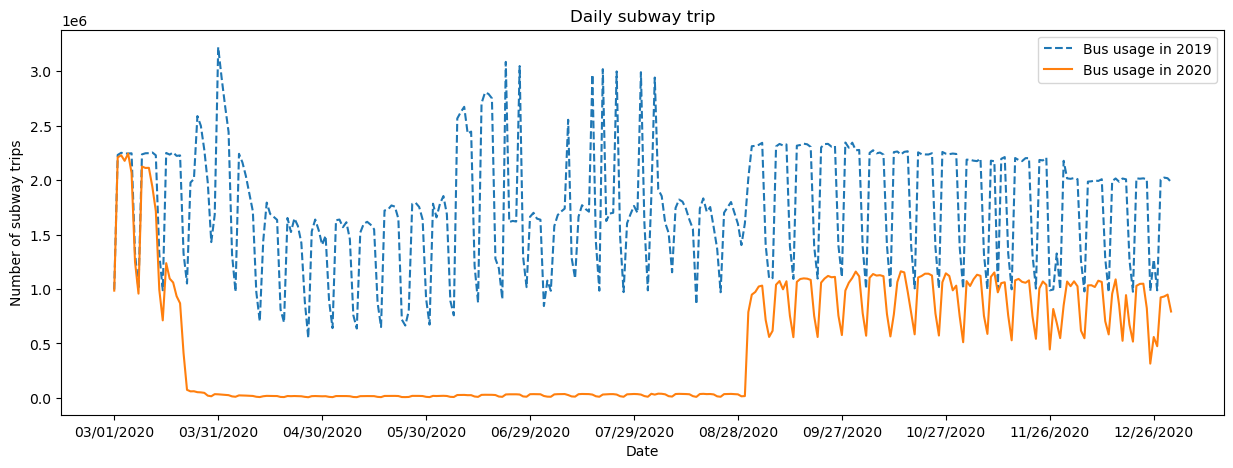

In [61]:
# plot subway usage versus date and infection versus date on a single chart
plt.figure(figsize=(15,5))
plt.plot(date, bus_19, label = "Bus usage in 2019", linestyle="--")
plt.plot(date, bus, label = "Bus usage in 2020")
plt.xticks(date[::30], rotation=0, horizontalalignment="center")
plt.xlabel("Date")
plt.ylabel("Number of subway trips")
plt.title("Daily subway trip")
plt.legend()
plt.show()

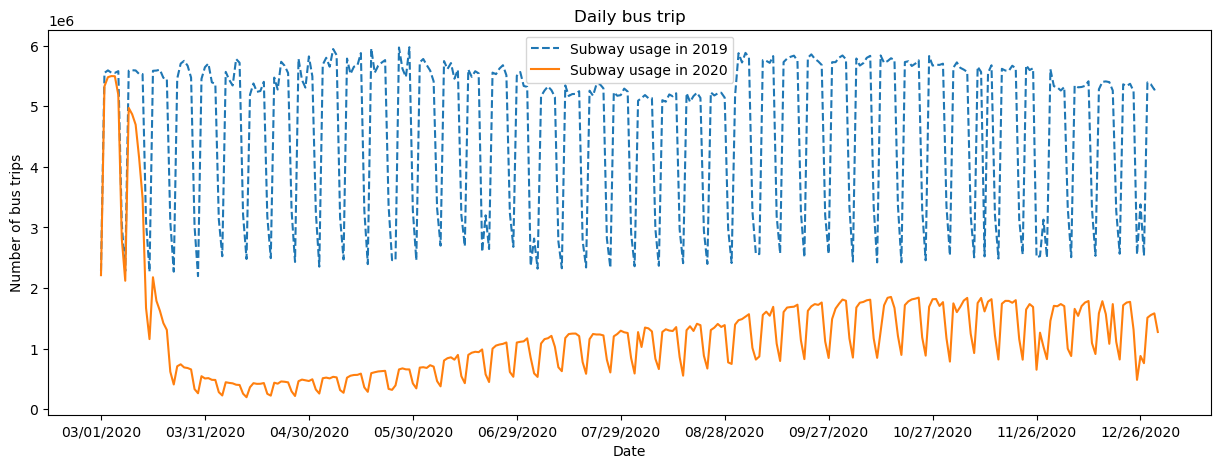

In [62]:
# plot bus usage versus date and infection versus date on a single chart
plt.figure(figsize=(15,5))
plt.plot(date, subway_19, label = "Subway usage in 2019", linestyle="--")
plt.plot(date, subway, label = "Subway usage in 2020")
plt.xticks(date[::30], rotation=0, horizontalalignment="center")
plt.xlabel("Date")
plt.ylabel("Number of bus trips")
plt.title("Daily bus trip")
plt.legend()
plt.show()

In [27]:
# Read Covid data
df_covid = pd.read_csv("Dataset/New_York_State_Statewide_COVID-19_Testing.csv")

In [31]:
covid_dict = {}
county_dict = {}
county_range = ["Bronx", "New York", "Richmond", "Kings", "Queens"]
# read data to dictionary
for index, row in df_covid.iterrows():
    county = row['County']
    if county in county_range:
        if county not in county_dict:
            county_dict[county] = {'test_dates': [], 'new_positives': []}
        county_dict[county]['test_dates'].append(row['Test Date'])
        county_dict[county]['new_positives'].append(row['New Positives'])

In [48]:
county_range_bike = ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"]
county_range_covid = ["Bronx", "New York", "Richmond", "Kings", "Queens"]
# Covid data was grouped by county, need to sum up to account for whole NYC
covid_counts_sum = [0 for i in range(len(list(county_dict[county_range_covid[0]]['new_positives'])))]
for i in range(5):
    covid_counts = list(county_dict[county_range_covid[i]]['new_positives'])
    for i in range(len(covid_counts)):
        covid_counts_sum[i] += covid_counts[i]
acs_covid_counts_2020 = covid_counts_sum
acs_covid_counts_2020.reverse()

# calculate correlation
correlation = np.corrcoef(bus, acs_covid_counts_2020[0:306])[0,1]
print("Correlation in 2020 between Covid and bus is:", correlation)
correlation = np.corrcoef(subway, acs_covid_counts_2020[0:306])[0,1]
print("Correlation in 2020 between Covid and subway is:", correlation)

Correlation in 2020 between Covid and bus is: -0.08198681117096458
Correlation in 2020 between Covid and subway is: -0.26888479767887474


In [73]:
def calculate_granger_causation_matrix(data, variables, max_lag, test='ssr_chi2test'):
    num_vars = len(variables)
    matrix = pd.DataFrame(np.zeros((num_vars, num_vars)), columns=variables, index=variables)

    for i, causing_var in enumerate(variables):
        for j, caused_var in enumerate(variables):

            test_results = grangercausalitytests(data[[caused_var, causing_var]], max_lag, verbose=False)
            lag_values = [round(test_results[k + 1][0][test][1], 4) for k in range(max_lag)]

            # find the minimum p value
            min_p_value = np.min(lag_values)
            matrix.iloc[j, i] = min_p_value

    matrix.columns = [var + '_cause' for var in variables]
    matrix.index = [var + '_effect' for var in variables]
    return matrix

def find_min_lag(df):
    aic, bic= [], []
    model = VAR(df)
    arr = np.arange(1,50)
    for i in arr:
        result = model.fit(i)
        aic.append(result.aic)
        bic.append(result.bic)
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

    ax[0].plot(arr, aic, label='AIC',marker='o')
    # plot the second graph
    ax[1].plot(arr, bic, label='BIC',marker='o')
    # ax.set_title("AIC vs BIC")
    ax[0].set_title('AIC')
    ax[1].set_title('BIC')

    return (np.argmin(aic) + 1, np.argmin(bic) + 1)

10
              covid_cause  bus_cause
covid_effect       1.0000     0.0002
bus_effect         0.0024     1.0000


10
               covid_cause  subway_cause
covid_effect        1.0000           0.0
subway_effect       0.0073           1.0




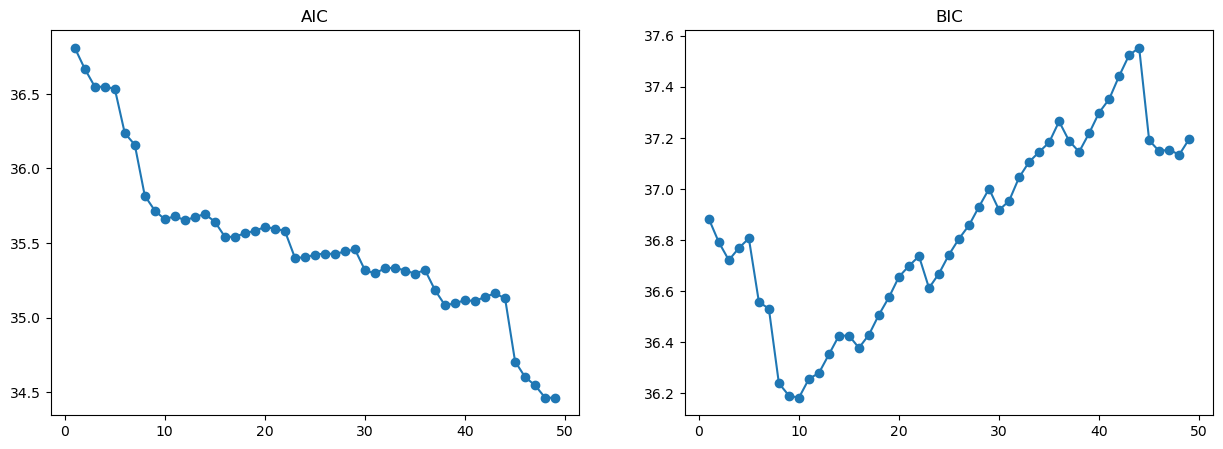

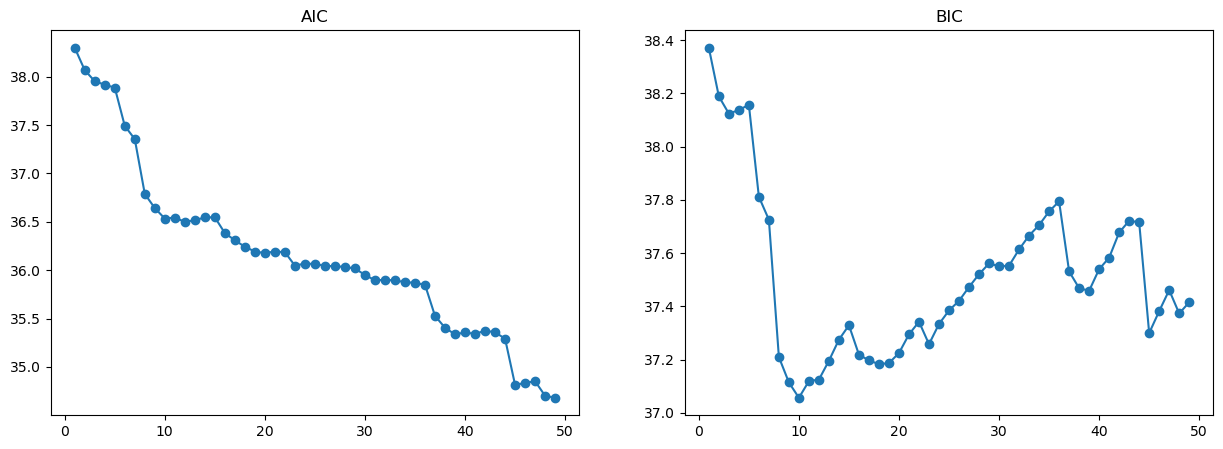

In [74]:
# calculate for granger causality regarding covid and bike
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR

# store correspond to county monthly count inside array
covid_counts = acs_covid_counts_2020
start_dates = date
bus_counts = bus

covid_arr = []
bus_arr = []
col_arr = []

# only for year 2020
covid_arr = covid_counts[0:366-60]
bus_arr = bus_counts
# Convert the data into a DataFrame
df = pd.DataFrame({'covid': covid_arr, 'bus': bus_arr})

# select p values
min_p = np.min(find_min_lag(df))
print(min_p)

# perform granger analysis

model = VAR(df)
var_model = model.fit(min_p)
print(calculate_granger_causation_matrix(df, df.columns, min_p))
print("\n")

# store correspond to county monthly count inside array
covid_counts = acs_covid_counts_2020
start_dates = date
subway_counts = subway

covid_arr = []
subway_arr = []
col_arr = []

# only for year 2020
covid_arr = covid_counts[0:366-60]
subway_arr = subway_counts
# Convert the data into a DataFrame
df = pd.DataFrame({'covid': covid_arr, 'subway': subway_arr})

# select p values
min_p = np.min(find_min_lag(df))
print(min_p)

# perform granger analysis

model = VAR(df)
var_model = model.fit(min_p)
print(calculate_granger_causation_matrix(df, df.columns, min_p))
print("\n")